In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [2]:
data = pd.read_csv("dataset_2193_autoPrice.csv")
data.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,class
0,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,101.2,176.8,64.8,54.3,2395,108,3.50,2.8,8.8,101,5800,23,29,16430


array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'normalized-losses'}>,
        <Axes: title={'center': 'wheel-base'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb-weight'}>,
        <Axes: title={'center': 'engine-size'}>],
       [<Axes: title={'center': 'bore'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compression-ratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peak-rpm'}>,
        <Axes: title={'center': 'city-mpg'}>,
        <Axes: title={'center': 'highway-mpg'}>,
        <Axes: title={'center': 'class'}>]], dtype=object)

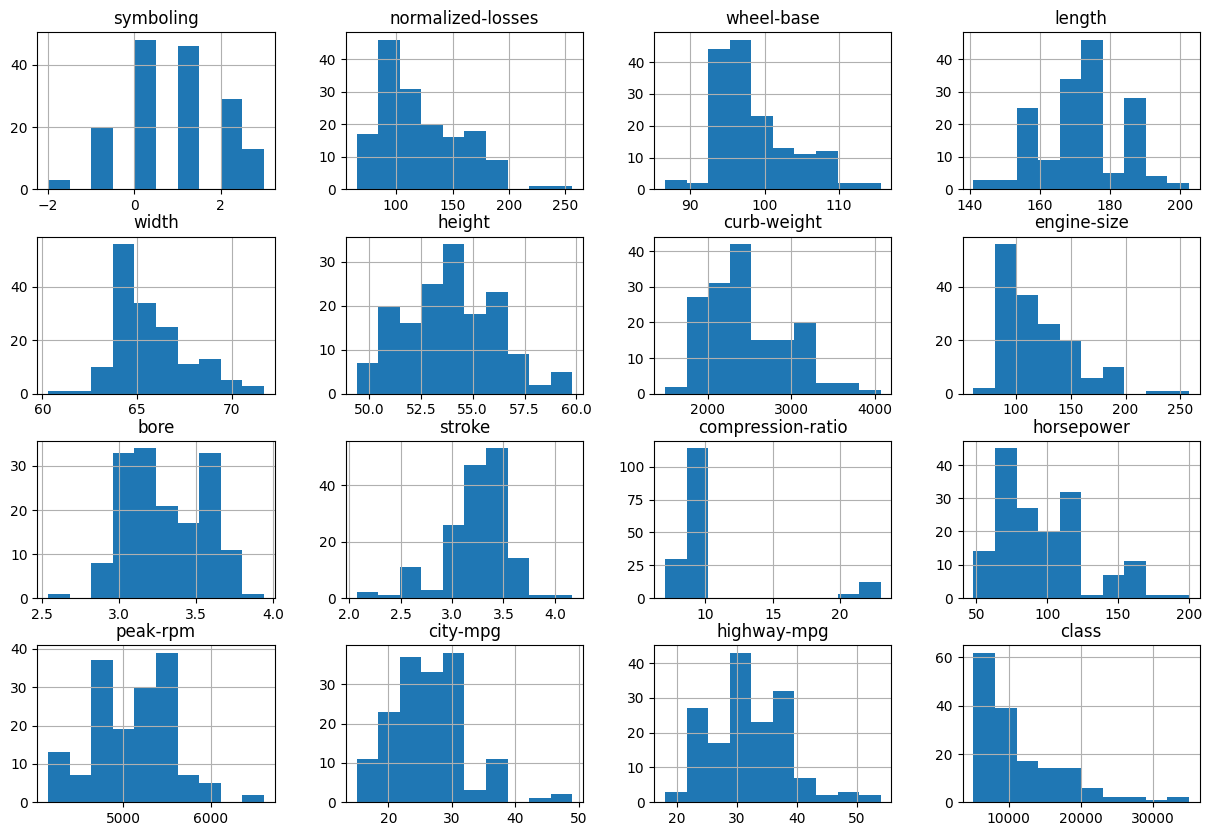

In [3]:
data.hist(figsize=(15, 10))

In [4]:
data.shape

(159, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    int64  
 2   wheel-base         159 non-null    float64
 3   length             159 non-null    float64
 4   width              159 non-null    float64
 5   height             159 non-null    float64
 6   curb-weight        159 non-null    int64  
 7   engine-size        159 non-null    int64  
 8   bore               159 non-null    float64
 9   stroke             159 non-null    float64
 10  compression-ratio  159 non-null    float64
 11  horsepower         159 non-null    int64  
 12  peak-rpm           159 non-null    int64  
 13  city-mpg           159 non-null    int64  
 14  highway-mpg        159 non-null    int64  
 15  class              159 non-null    int64  
dtypes: float64(7), int64(9)
me

In [6]:
df_numeric_features = data.select_dtypes(include=[np.number])

df_numeric_features.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'class'],
      dtype='object')

In [7]:
df_categorical_features = data.select_dtypes(include=[object])

df_categorical_features.columns

Index([], dtype='object')

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [9]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

#scaling down the numeric variables
df_newdata = pd.DataFrame(min_max.fit_transform(data.iloc[:,0:16]),
columns = data.iloc[:,0:16].columns.tolist())    

In [10]:
df_newdata.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,class
0,0.8,0.518325,0.455172,0.577236,0.517544,0.471154,0.329325,0.243655,0.464286,0.633333,0.18750,0.355263,0.551020,0.264706,0.333333,0.295010
1,0.8,0.518325,0.441379,0.577236,0.535088,0.471154,0.518231,0.380711,0.464286,0.633333,0.06250,0.440789,0.551020,0.088235,0.111111,0.411918
2,0.6,0.486911,0.662069,0.839024,0.973684,0.605769,0.525989,0.380711,0.464286,0.633333,0.09375,0.407895,0.551020,0.117647,0.194444,0.420603
3,0.6,0.486911,0.662069,0.839024,0.973684,0.625000,0.619860,0.355330,0.421429,0.633333,0.08125,0.605263,0.551020,0.058824,0.055556,0.626528
4,0.8,0.664921,0.503448,0.580488,0.394737,0.471154,0.351823,0.238579,0.685714,0.347619,0.11250,0.348684,0.673469,0.235294,0.305556,0.377848


In [11]:
X = df_newdata.drop(['compression-ratio', 'class'], axis=1)

y = df_newdata['class']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [13]:
X_train.shape, X_test.shape

((106, 14), (53, 14))

In [14]:
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

RandomForestRegressor(random_state=42)

In [15]:
Y_pred = regressor.predict(X_test)

In [16]:
Y_pred

array([0.37447592, 0.56326775, 0.17452769, 0.13407971, 0.27557318,
       0.13805376, 0.13974781, 0.03934932, 0.08730777, 0.10495123,
       0.02181375, 0.05581936, 0.03904603, 0.06544626, 0.06659363,
       0.1939368 , 0.17452769, 0.09786882, 0.32295611, 0.03904603,
       0.32312045, 0.32254125, 0.02131338, 0.02255495, 0.12582771,
       0.17541786, 0.32097067, 0.13193472, 0.1221942 , 0.38432895,
       0.15814539, 0.38139822, 0.35957445, 0.39812212, 0.56027123,
       0.03904736, 0.78593059, 0.14178491, 0.05998564, 0.09721324,
       0.11780379, 0.39357673, 0.14157826, 0.36745875, 0.06414791,
       0.06590186, 0.37405839, 0.05667212, 0.0949833 , 0.28885029,
       0.0874848 , 0.01426648, 0.04036008])

In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2 = r2_score(y_test, Y_pred)
print(r2)
mse = mean_squared_error(y_test, Y_pred)
print(mse)
mae = mean_absolute_error(y_test, Y_pred)
print(mae)

0.8790169511165676
0.0036516052096117017
0.04421541626279218


In [27]:
feature_scores = pd.DataFrame(regressor.feature_importances_, index=X_train.columns, columns= ['Importance']).sort_values(by = 'Importance', ascending=False)
feature_scores

,Importance
curb-weight,0.290505
width,0.258554
engine-size,0.140174
highway-mpg,0.064565
length,0.062606
horsepower,0.052334
wheel-base,0.045308
city-mpg,0.037246
normalized-losses,0.017616
height,0.009242


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


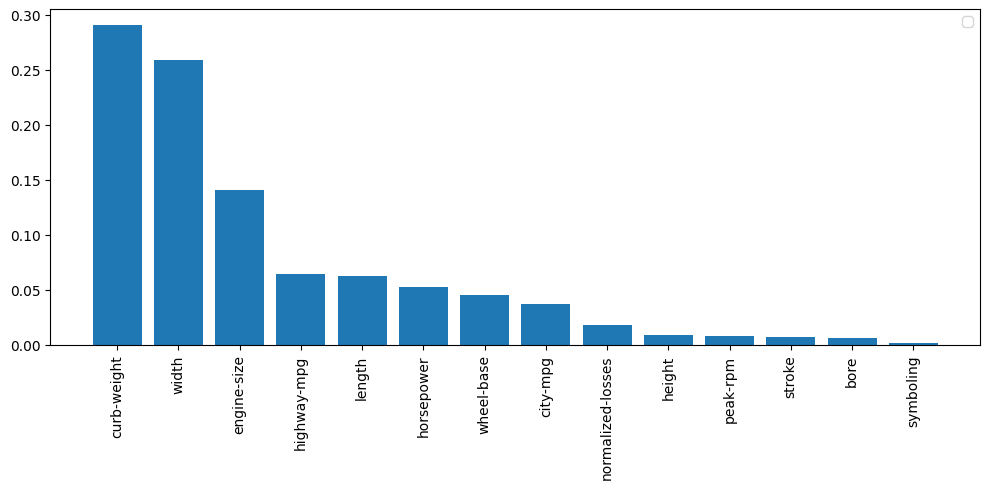

In [30]:
plt.figure(figsize=(10,5))
plt.bar(feature_scores.index, feature_scores['Importance'])
plt.subplots_adjust(bottom=0.15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()